<img src="banner.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

##### Short Pre-Processing

In [2]:
def cutdt(df):
    for idx, val in enumerate(df['confirmados']):
        if val!=0:
            where = idx
            break
    return df.iloc[where:]

In [49]:
dt = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')

dt = cutdt(dt).reset_index()

dt = dt.fillna(0)

dt

,index,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
0,5,02-03-2020,02-03-2020 00:00,2,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,03-03-2020,03-03-2020 16:00,4,2,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,04-03-2020,04-03-2020 17:00,6,3,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,05-03-2020,05-03-2020 17:00,9,5,1,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,06-03-2020,06-03-2020 17:00,13,8,1,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10,07-03-2020,07-03-2020 17:00,21,15,1,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11,08-03-2020,08-03-2020 17:30,30,22,1,6,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12,09-03-2020,09-03-2020 18:45,39,27,1,9,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13,10-03-2020,10-03-2020 10:00,41,27,2,10,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,14,11-03-2020,11-03-2020 00:00,59,36,3,17,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### General Analysis

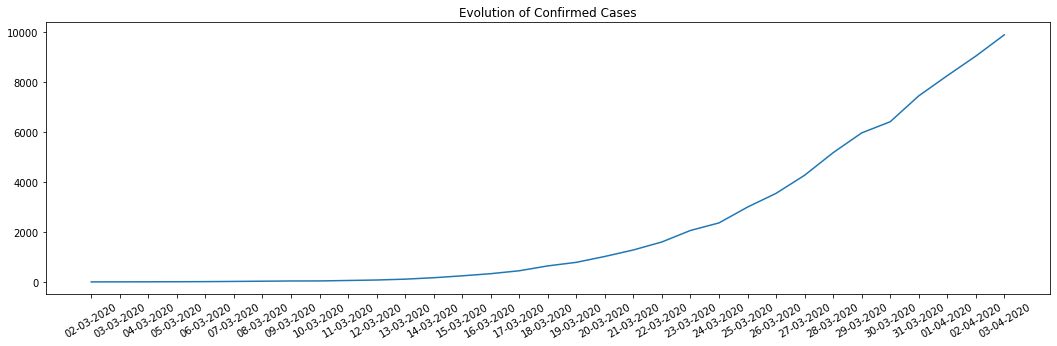

In [4]:
fig1, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['confirmados'])
plt.title('Evolution of Confirmed Cases')
plt.xticks(rotation=30)
plt.show()

fig1.savefig('Daily Report/evolution_cases.png')

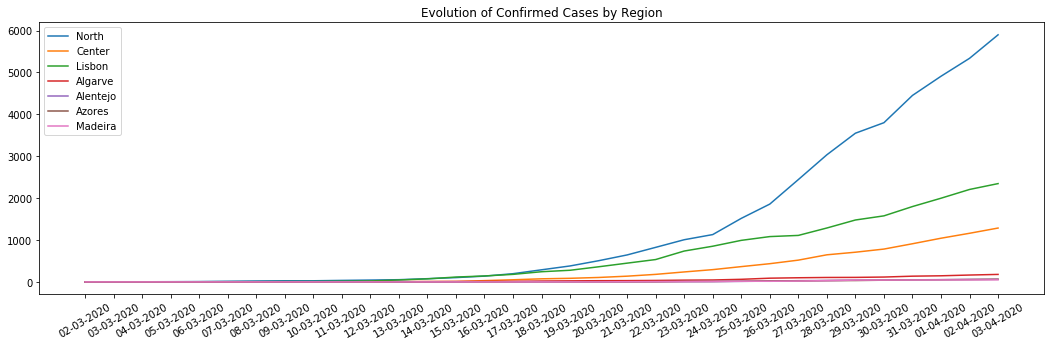

In [5]:
fig2 = plt.figure(figsize=(18,5))
plt.plot(dt['data'], 'confirmados_arsnorte', data=dt, label='North')
plt.plot(dt['data'], 'confirmados_arscentro', data=dt,label="Center")
plt.plot(dt['data'], 'confirmados_arslvt', data=dt, label='Lisbon')
plt.plot(dt['data'], 'confirmados_arsalgarve', data=dt, label='Algarve')
plt.plot(dt['data'], 'confirmados_arsalentejo', data=dt, label='Alentejo')
plt.plot(dt['data'], 'confirmados_acores', data=dt, label='Azores')
plt.plot(dt['data'], 'confirmados_madeira', data=dt, label='Madeira')
plt.legend()
plt.xticks(rotation=30)
plt.title('Evolution of Confirmed Cases by Region')
plt.show()

fig2.savefig('Daily Report/evolution_cases_byRegion.png')

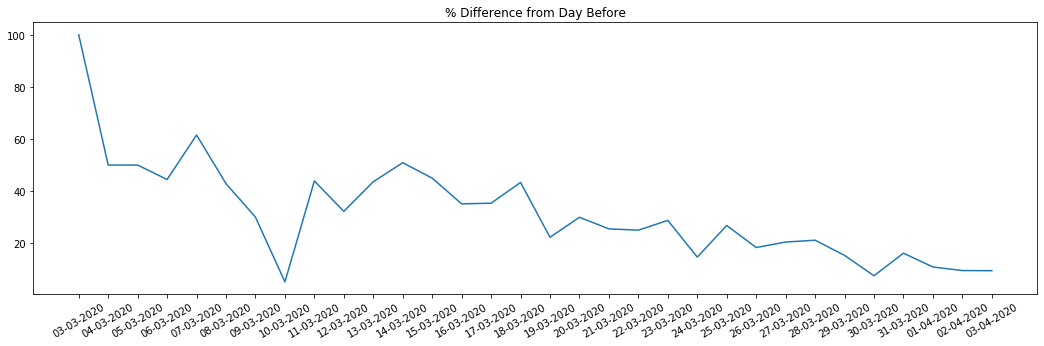

In [6]:
actuals = [x for x in dt['confirmados']]
actuals.reverse()

diff = []
for i in range(len(actuals)):
    if i != len(actuals)-1:
        difference = ((actuals[i]-actuals[i+1])/actuals[i+1])*100
        diff.append(difference)
    else:
        break
        
diff.reverse()

dates = [x for x in dt['data']][1:]

#########

fig3 = plt.figure(figsize=(18,5))
plt.plot(dates, diff)
plt.xticks(rotation=30)
plt.title('% Difference from Day Before')

fig3.savefig('Daily Report/evolution_percentage.png')

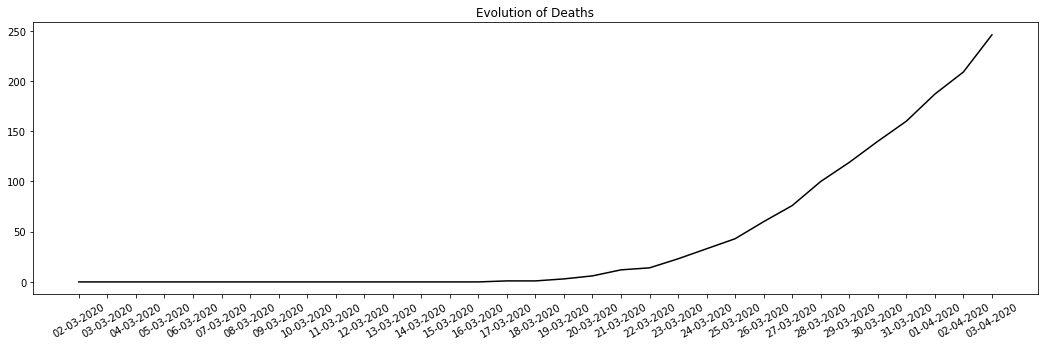

In [7]:
fig4, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['obitos'], color='black')
plt.title('Evolution of Deaths')
plt.xticks(rotation=30)
plt.show()

fig4.savefig('Daily Report/evolution_deaths.png')

In [48]:
dt[10:11]

,index,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
10,15,12-03-2020,12-03-2020 00:00,78,44,5,23,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def funta(day):
    confirmados_m = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    return confirmados_m

In [43]:
funta(10)

{'0_9': 1,
 '10_19': 5,
 '20_29': 6,
 '30_39': 8,
 '40_49': 11,
 '50_59': 8,
 '60_69': 6,
 '70_79': 2,
 '80_plus': 2}

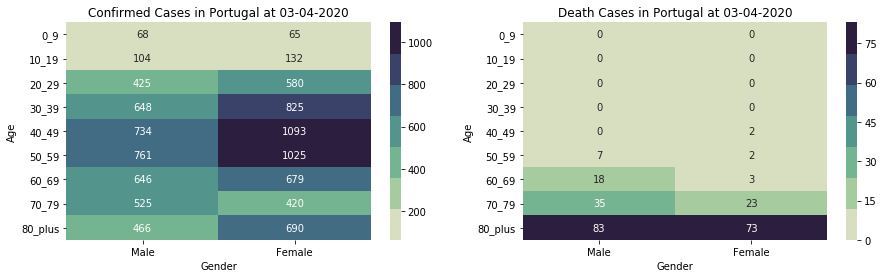

In [50]:
     ### CONFIRMED CASES

#define dictionaries
confirmados_m = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
confirmados_f = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

#create dataframe with confirmed cases
confirmados = pd.DataFrame.from_dict(confirmados_m, orient='index', columns=['Male'])
confirmados['Female'] = pd.Series(confirmados_f, name='Female')

      ### DEATH CASES

#define dictionaries
obitos_m = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
obitos_f = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

#create dataframes with death cases
obitos = pd.DataFrame.from_dict(obitos_m, orient='index', columns=['Male'])
obitos['Female'] = pd.Series(obitos_f, name='Female')

    ### PLOT HEATMAPS

fig5, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

sns.heatmap(confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax1, fmt='g')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax1.set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[-1]['data']))
ax1.set_xlabel('Gender')
ax1.set_ylabel('Age')

sns.heatmap(obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax2, fmt='g')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
ax2.set_title('Death Cases in Portugal at '+ str(dt.iloc[-1]['data']))
ax2.set_xlabel('Gender')
ax2.set_ylabel('Age')

plt.show()

fig5.savefig('Daily Report/heatmaps_confirmed_death.png')

In [59]:
def compare_day_with_today(day):

            ### CONFIRMED CASES

    #define dictionaries for day
    day_confirmados_m = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    day_confirmados_f = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

    #create dataframe with confirmed cases for day
    day_confirmados = pd.DataFrame.from_dict(day_confirmados_m, orient='index', columns=['Male'])
    day_confirmados['Female'] = pd.Series(day_confirmados_f, name='Female')

          ### DEATH CASES

    #define dictionaries for day
    day_obitos_m = {col[:-2][7:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
    day_obitos_f = {col[:-2][7:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

    #create dataframes with death cases for day
    day_obitos = pd.DataFrame.from_dict(day_obitos_m, orient='index', columns=['Male'])
    day_obitos['Female'] = pd.Series(day_obitos_f, name='Female')
    
        ### CONFIRMED CASES

    #define dictionaries for today
    today_confirmados_m = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    today_confirmados_f = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

    #create dataframe with confirmed cases for today
    today_confirmados = pd.DataFrame.from_dict(today_confirmados_m, orient='index', columns=['Male'])
    today_confirmados['Female'] = pd.Series(today_confirmados_f, name='Female')

          ### DEATH CASES

    #define dictionaries for today
    today_obitos_m = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
    today_obitos_f = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

    #create dataframes with death cases for today
    today_obitos = pd.DataFrame.from_dict(today_obitos_m, orient='index', columns=['Male'])
    today_obitos['Female'] = pd.Series(today_obitos_f, name='Female')
    

        ### PLOT HEATMAPS

    fig6, axs = plt.subplots(2,2, figsize=(15,12))

    sns.heatmap(day_confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[0,0], fmt='g')
    bottom, top = axs[0,0].get_ylim()
    axs[0,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[0,0].set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[day]['data']))
    axs[0,0].set_xlabel('Gender')
    axs[0,0].set_ylabel('Age')
    axs[0,0].set_yticklabels(axs[0,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[0,1], fmt='g')
    bottom, top = axs[0,1].get_ylim()
    axs[0,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[0,1].set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[-1]['data']))
    axs[0,1].set_xlabel('Gender')
    axs[0,1].set_ylabel('Age')
    axs[0,1].set_yticklabels(axs[0,1].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(day_obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[1,0], fmt='g')
    bottom, top = axs[1,0].get_ylim()
    axs[1,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[1,0].set_title('Death Cases in Portugal at '+ str(dt.iloc[day]['data']))
    axs[1,0].set_xlabel('Gender')
    axs[1,0].set_ylabel('Age')
    axs[1,0].set_yticklabels(axs[1,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[1,1], fmt='g')
    bottom, top = axs[1,1].get_ylim()
    axs[1,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[1,1].set_title('Death Cases in Portugal at '+ str(dt.iloc[-1]['data']))
    axs[1,1].set_xlabel('Gender')
    axs[1,1].set_ylabel('Age')
    axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(), rotation=0, horizontalalignment='right')

    plt.show()

    fig6.savefig('Daily Report/comparison_confirmed_death.png')

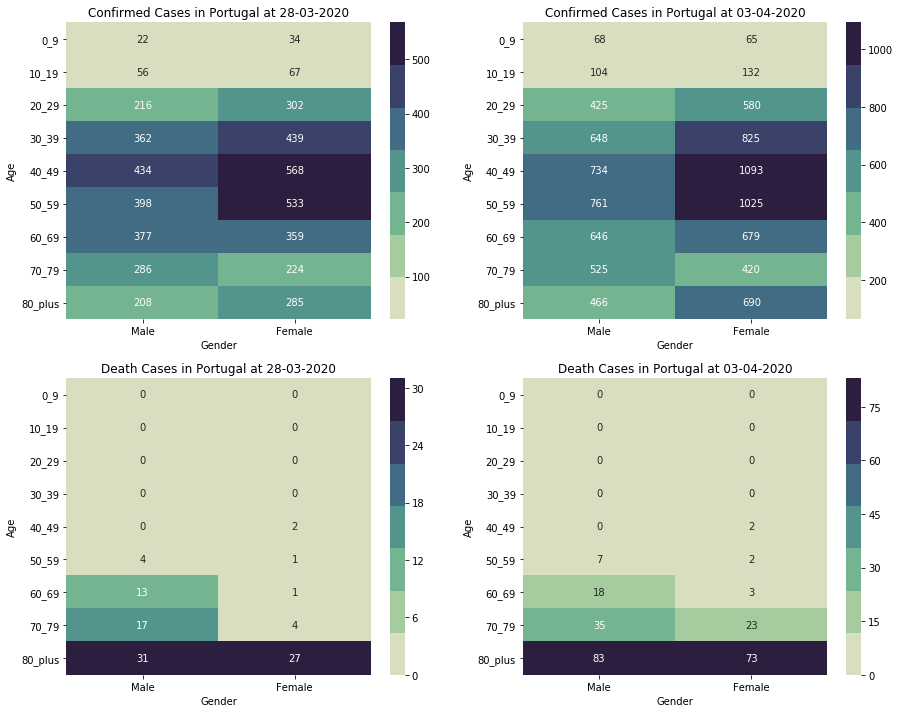

In [60]:
compare_day_with_today(len(dt)-7)

##### Model Building & Predictions (functions)

In [61]:
def build_model(n_days, column):
    
    
    X = [x for x in range(n_days)]
    X = np.reshape(X, (len(X), 1))
    
    Y = np.log(dt[str(column)].loc[:(n_days-1)])
    
    model = linear_model.LinearRegression()
    
    model.fit(X,Y)
    
    #print('Slope: \n', model.coef_)
    #print('Intercept: \n', model.intercept_)
    #print()
    #print('Model: y = e^({} + x * {})'.format(round(float(model.intercept_),3),round(float(model.coef_),3)))
    
    return float(model.intercept_), float(model.coef_)

In [62]:
def predict(column, model_day, get_n_days):
    
    inter, coef = build_model(model_day,column)
    
    X = [x for x in range(get_n_days)]
    
    Y_pred = [np.exp(coef*i + inter) for i in X]
    
    return Y_pred

##### Plot Predictions

In [63]:
def plot_pred(column,model_day,color):
    return plt.plot(dt['data'], predict(column,model_day,len(dt)),
                    label=("Predicted on day "+str(model_day)),
                    color=color,
                    linestyle=':')

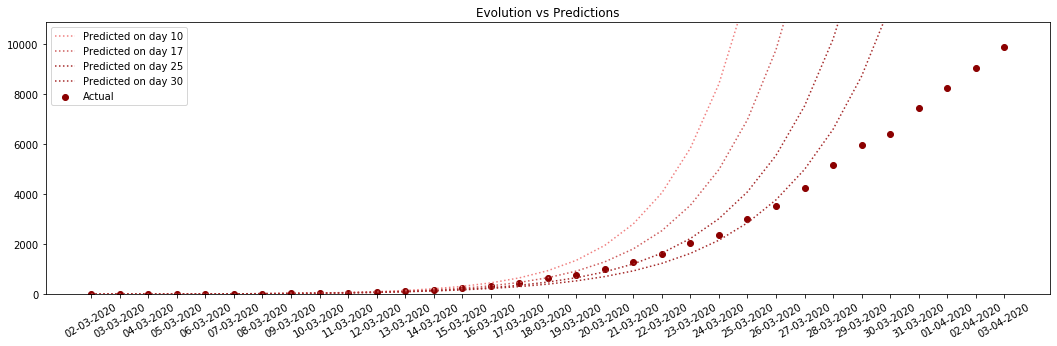

In [64]:
fig7 = plt.figure(figsize=(18,5))
plt.scatter(dt['data'], 'confirmados', data=dt,marker='o', label='Actual',color='darkred')
plot_pred('confirmados',10,'lightcoral')
plot_pred('confirmados',17,'indianred')
plot_pred('confirmados',25,'brown')
plot_pred('confirmados',30,'brown')
plt.xticks(rotation=30)
plt.ylim(0,max(dt['confirmados'])*1.10)
plt.legend()
plt.title('Evolution vs Predictions')

fig7.savefig('Daily Report/evolution_vs_predictions.png')